In [10]:
import numpy as np
from qiskit import QuantumCircuit
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
import qiskit.quantum_info as qi
import numpy.linalg as la

# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline
np.set_printoptions(precision=4)

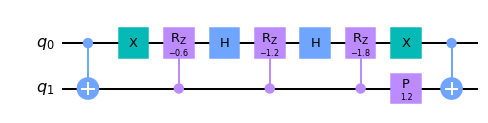

In [2]:
def bog_circ(theta, beta, phi):
    circ = QuantumCircuit(2)
    circ.cx(0, 1)
    circ.x(0)
    circ.crz(2 * -theta, 1, 0)
    circ.h(0)
    circ.crz(2 * -beta, 1, 0)
    circ.h(0)
    circ.crz(2 * -phi, 1, 0)
    circ.x(0)
    circ.p(theta + phi, 1)
    circ.cx(0, 1)
    return circ
    
theta = 0.3
beta = 0.6
phi = 0.9

circ = bog_circ(theta, beta, phi)
circ.draw('mpl')

In [3]:
def B(theta, beta, phi):
    B = np.zeros((4, 4), dtype=np.complex128)
    B[0,0] = 1
    B[3,3] = 1
    B[1,1] = np.cos(beta) * np.exp(1j * (theta + phi)) * np.exp(1j * (theta + phi))
    B[2,2] = np.cos(beta) * np.exp(1j * (-theta - phi)) * np.exp(1j * (theta + phi))
    B[2,1] = np.sin(beta) * 1j * np.exp(1j * (theta - phi)) * np.exp(1j * (theta + phi))
    B[1,2] = np.sin(beta) * 1j * np.exp(1j * (-theta + phi)) * np.exp(1j * (theta + phi))
    return B

In [7]:
for theta in np.linspace(0, 20, 30):
    for beta in np.linspace(0, 20, 30):
        for phi in np.linspace(0, 20, 30):
            circ_test = bog_circ(theta, beta, phi)
            B_known = B(theta, beta, phi)
            B_test = np.array(qi.Operator(circ_test))
            diff = B_known - B_test
            m_diff = np.max(np.abs(diff))
            if m_diff > 1e-4:
                print(m_diff)

In [14]:
# Test that B is unitary
B_test = np.matrix(B(theta, beta, phi))
print(np.max(np.abs(np.eye(4) - B_test @ B_test.H)))
print(np.max(np.abs(np.eye(4) - B_test.H @ B_test)))

2.220446049250313e-16
2.220446049250313e-16
